In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import csv

In [9]:
x=[]
y=[]
x0=[]
x1=[]

In [10]:
with open("data2.csv","r") as csvfile:
    lines=csv.reader(csvfile)
    dataset=list(lines)
    for i in range(len(dataset)):
        temp=dataset[i][0].split(",")
        a,b=float(temp[0]),float(temp[1])
        c=int(temp[2],2)
        x.append([a,b,a*a,b*b])
        y.append([c])
        if(c==0):
            x0.append([a,b])
        if(c==1):
            x1.append([a,b])
one=np.ones([len(x),1])
x=np.concatenate((one,x),axis=1)
y=np.array(y)
x0=np.array(x0)
x1=np.array(x1)
#Normalization is done here

#x=(x-np.mean(x))/np.std(x)
print(x)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01  2.62830529e-03
   4.89384194e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01  8.60107856e-03
   4.69142804e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01  4.56719641e-02
   4.79210063e-01]
 [ 1.00000000e+00 -3.75000000e-01  5.02190000e-01  1.40625000e-01
   2.52194796e-01]
 [ 1.00000000e+00 -5.13250000e-01  4.65640000e-01  2.63425562e-01
   2.16820610e-01]
 [ 1.00000000e+00 -5.24770000e-01  2.09800000e-01  2.75383553e-01
   4.40160400e-02]
 [ 1.00000000e+00 -3.98040000e-01  3.43570000e-02  1.58435842e-01
   1.18040345e-03]
 [ 1.00000000e+00 -3.05880000e-01 -1.92250000e-01  9.35625744e-02
   3.69600625e-02]
 [ 1.00000000e+00  1.67050000e-02 -4.04240000e-01  2.79057025e-04
   1.63409978e-01]
 [ 1.00000000e+00  1.31910000e-01 -5.13890000e-01  1.74002481e-02
   2.64082932e-01]
 [ 1.00000000e+00  3.85370000e-01 -5.65060000e-01  1.48510037e-01
   3.19292804e-01]
 [ 1.00000000e+00  5.29380000e-01 -5.21200000e-01  2.80243184e-01

In [11]:
#Spliting testing and training data using train_test_split method

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 50,test_size=.3)

# Intializing theta with zeros

theta = np.matrix(np.random.rand(x_train.shape[1],1))
print(theta)
#checking dimension
#print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

#set gradient parameters
count = 0
alpha = [0.1,0.03]
no_iter = 10000
theta=theta.T

[[0.42055836]
 [0.12139077]
 [0.35374478]
 [0.19649655]
 [0.48001941]]


[[ 2.50283957  0.43081065  1.68267525 -5.21487814 -5.43203451]]
[[ 1.96825093  0.20743732  1.28738694 -4.13018152 -4.27221198]]
parameters after gradient descent= [[ 2.50283957  0.43081065  1.68267525 -5.21487814 -5.43203451]]

parameters after gradient descent= [[ 1.96825093  0.20743732  1.28738694 -4.13018152 -4.27221198]]


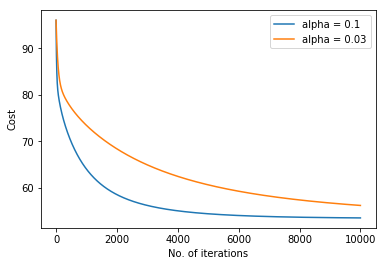

Correct predictions out of 36 test points is (For alpha = 0.1) 30
Accuracy achieved= 83.33333333333334 %

Correct predictions out of 36 test points is (For alpha = 0.03) 30
Accuracy achieved= 83.33333333333334 %


In [12]:
##Gradient Descent + Regularizer ##
lemda=0.1
def gradient_descent(X,Y,theta,alpha,no_iter):
    cost=[]
    for i in range(0,no_iter):
        hypo = X * theta.T           
        hypo = 1 / (1 + np.exp((-1) * hypo))
        temp = np.log2( hypo )
        temp1 = np.log2(1 - hypo)
        y_1 = (-1)*(np.matmul(Y.T,temp))
        y_0 = (-1)*(np.matmul((1-Y).T,temp1))
        error = hypo - Y
        cost_value = y_1 + y_0
        cost.append(cost_value)
        gradient = (error.T*X)/len(X)
        theta = theta-(alpha * (gradient + lemda / len(X) * theta))
    return theta,cost

cost_list = []
para_list = []
for a in alpha:
    para,cost=gradient_descent(x_train,y_train,theta,a,no_iter)
    print(para)
    cost_list.append(cost)
    para_list.append(para)

print("parameters after gradient descent=",para_list[0])
print()
print("parameters after gradient descent=",para_list[1])
it=np.arange(0,no_iter)
plt.plot(it,np.squeeze(cost_list[0]),label="alpha = 0.1")
plt.plot(it,np.squeeze(cost_list[1]),label="alpha = 0.03")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()

##calculating sum of squared error of the test data

predicted_y = np.matmul(x_test,para_list[0].transpose())
predicted_y = 1/(1 + np.exp((-1) * predicted_y))
predicted_y = np.where(predicted_y >= 0.5,1,0)
predicted_y = np.squeeze(predicted_y)

for i in range(0,len(predicted_y)):
    #print(tempy[i]," ",y_test[i])
    if(predicted_y[i] == y_test[i]):
        count=count+1
print("Correct predictions out of 36 test points is (For alpha = 0.1)",count)
print("Accuracy achieved=",count/len(predicted_y)*100,"%")
count = 0
predicted_y = np.matmul(x_test,para_list[1].transpose())
predicted_y = 1/(1 + np.exp((-1) * predicted_y))
predicted_y = np.where(predicted_y >= 0.5,1,0)
predicted_y = np.squeeze(predicted_y)

for i in range(0,len(predicted_y)):
    if(predicted_y[i] == y_test[i]):
        count=count+1
print()
print("Correct predictions out of 36 test points is (For alpha = 0.03)",count)
print("Accuracy achieved=",count/len(predicted_y)*100,"%")

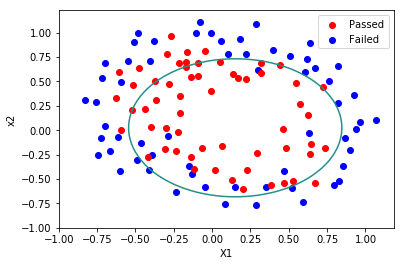

In [13]:
u = np.linspace(-1, 1.0, 50)
v = np.linspace(-1, 1.0, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = para_list[1][0,0]+para_list[1][0,1]*u[i]+para_list[1][0,2]*v[j]+para_list[1][0,3]*u[i]*u[i]+para_list[1][0,4]*v[j]*v[j]

failed = plt.scatter([x0[:,0]],[x0[:,1]],c='b',label='y=0')
passed = plt.scatter([x1[:,0]],[x1[:,1]],c='r',label='y=1')
plt.contour(u,v,z,0)
plt.xlabel('X1')
plt.ylabel('x2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()
